# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [266]:
import pandas as pd
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [268]:
df_releases = pd.read_csv('releasedates.csv')
df_titles = pd.read_csv('titles.csv')
df_cast = pd.read_csv('cast.csv')

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [270]:
base_path = Path(".")

files = {
    "titles": base_path / "titles.csv",
    "releasedates": base_path / "releasedates.csv",
    "cast": base_path / "cast.csv"
}

datasets = {}
for name, path in files.items():
    try:
        df = pd.read_csv(path, low_memory=False)
        datasets[name] = df
        print(f" Loaded {name}.csv with {len(df):,} rows and {len(df.columns)} columns.")
    except Exception as e:
        print(f" Error loading {name}: {e}")

summary_list = []
for name, df in datasets.items():
    summary = {
        "File": name,
        "Rows": len(df),
        "Columns": len(df.columns),
        "Numeric_Cols": len(df.select_dtypes(include=["number"]).columns),
        "String_Cols": len(df.select_dtypes(include=["object"]).columns),
        "Datetime_Cols": len(df.select_dtypes(include=["datetime", "datetimetz"]).columns),
        "Missing_Values(%)": round(df.isna().mean().mean() * 100, 2),
    }
    summary_list.append(summary)

summary_df = pd.DataFrame(summary_list)
print("\n=== Dataset Overview ===")
display(summary_df)

for name, df in datasets.items():
    print(f"\n {name}.csv — Column Summary\n")
    col_summary = pd.DataFrame({
        "Column": df.columns,
        "DataType": df.dtypes.astype(str),
        "Missing_%": round(df.isna().mean() * 100, 2),
        "Example_Value": [
            df[c].dropna().astype(str).head(1).iloc[0] if df[c].notna().any() else ""
            for c in df.columns
        ]
    })
    display(col_summary.head(10))

for name, df in datasets.items():
    print(f"\n Preview of {name}.csv:")
    display(df.head(5))


 Loaded titles.csv with 226,013 rows and 2 columns.
 Loaded releasedates.csv with 443,486 rows and 4 columns.
 Loaded cast.csv with 3,442,902 rows and 6 columns.

=== Dataset Overview ===


,File,Rows,Columns,Numeric_Cols,String_Cols,Datetime_Cols,Missing_Values(%)
0,titles,226013,2,1,1,0,0.00
1,releasedates,443486,4,1,3,0,0.00
2,cast,3442902,6,2,4,0,6.43



 titles.csv — Column Summary



,Column,DataType,Missing_%,Example_Value
title,title,object,0.0,Ankara ekspresi
year,year,int64,0.0,1952



 releasedates.csv — Column Summary



,Column,DataType,Missing_%,Example_Value
title,title,object,0.0,"#73, Shaanthi Nivaasa"
year,year,int64,0.0,2007
country,country,object,0.0,India
date,date,object,0.0,2007-06-15



 cast.csv — Column Summary



,Column,DataType,Missing_%,Example_Value
title,title,object,0.00,Closet Monster
year,year,int64,0.00,2015
name,name,object,0.00,Buffy #1
type,type,object,0.00,actor
character,character,object,0.00,Buffy 4
n,n,float64,38.57,31.0



 Preview of titles.csv:


,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993



 Preview of releasedates.csv:


,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21



 Preview of cast.csv:


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### 2. How many movies have the title North by Northwest

In [273]:
count_north_by_northwest = len(df_titles[df_titles['title'] == 'North by Northwest'])
print(f"The number of movies with the exact title 'North by Northwest' is: {count_north_by_northwest}")


The number of movies with the exact title 'North by Northwest' is: 1


### 3. How many version of Hamlet are there, when was the first made? the last?

In [276]:
hamlet_titles = df_titles[df_titles['title'] == 'Hamlet']

hamlet_releases = pd.merge(
    hamlet_titles,
    df_releases,
    on=['title', 'year'],
    how='left'
)

hamlet_table = hamlet_releases[['title', 'date', 'country']].sort_values(by='date')

count_versions = len(hamlet_titles.drop_duplicates(subset=['title', 'year']))
total_releases = len(hamlet_table)

date_series = pd.to_datetime(hamlet_table['date'], errors='coerce').dropna()

if not date_series.empty:
    earliest_release_date = date_series.min().strftime('%Y-%m-%d')
    latest_release_date = date_series.max().strftime('%Y-%m-%d')
else:
    earliest_release_date = 'N/A'
    latest_release_date = 'N/A'

print("## Table of 'Hamlet' Movie Releases (by Date)\\n")
print(f"Showing the first 20 of {total_releases:,} total releases across all versions.\\n")
print(hamlet_table.head(20).to_markdown(index=False, numalign="left", stralign="left"))

print("\n## Summary")
print(f"Number of unique 'Hamlet' movie versions (by title/year): {count_versions}")
print(f"Total number of country-specific releases found: {total_releases:,}")
print(f"Earliest release date of any 'Hamlet' version: {earliest_release_date}")
print(f"Latest release date of any 'Hamlet' version: {latest_release_date}")

## Table of 'Hamlet' Movie Releases (by Date)\n
Showing the first 20 of 91 total releases across all versions.\n
| title   | date       | country   |
|:--------|:-----------|:----------|
| Hamlet  | 1910-02-02 | USA       |
| Hamlet  | 1911-02-27 | Denmark   |
| Hamlet  | 1911-03-18 | UK        |
| Hamlet  | 1911-04-15 | USA       |
| Hamlet  | 1921-01-10 | Finland   |
| Hamlet  | 1921-01-26 | Denmark   |
| Hamlet  | 1921-01-27 | Germany   |
| Hamlet  | 1921-11-08 | USA       |
| Hamlet  | 1922-02-04 | Hungary   |
| Hamlet  | 1948-08-12 | Australia |
| Hamlet  | 1948-09-28 | Sweden    |
| Hamlet  | 1948-10-14 | France    |
| Hamlet  | 1948-10-29 | Finland   |
| Hamlet  | 1948-11-08 | Denmark   |
| Hamlet  | 1948-12-03 | Austria   |
| Hamlet  | 1948-12-10 | Germany   |
| Hamlet  | 1949-01-24 | Portugal  |
| Hamlet  | 1949-01-28 | Italy     |
| Hamlet  | 1949-07-07 | Hong Kong |
| Hamlet  | 1949-09-27 | Japan     |

## Summary
Number of unique 'Hamlet' movie versions (by title/year): 20


### 4. List all the movies called Treasure Island from oldest to newest

In [278]:
ti_titles_all = df_titles[
    df_titles['title'].astype(str).str.contains("treasure island", case=False, na=False)
].copy()

count_titles = len(ti_titles_all.drop_duplicates(subset=['title', 'year']))
print(f" Found {count_titles} unique title/year combinations containing 'Treasure Island'")

ti_movies = ti_titles_all[['title', 'year']].drop_duplicates().sort_values(by='year')

first_year = ti_movies['year'].min()
last_year = ti_movies['year'].max()

print("\n Treasure Island movies from oldest to newest (by production year):\n")
print(ti_movies.head(20).to_markdown(index=False, numalign="left", stralign="left"))

print(f"\n Earliest version made: {first_year}")
print(f" Most recent version made: {last_year}")

 Found 18 unique title/year combinations containing 'Treasure Island'

 Treasure Island movies from oldest to newest (by production year):

| title                                                | year   |
|:-----------------------------------------------------|:-------|
| Treasure Island                                      | 1918   |
| Treasure Island                                      | 1920   |
| Treasure Island                                      | 1934   |
| The Secret of Treasure Island                        | 1938   |
| Treasure Island                                      | 1950   |
| Return to Treasure Island                            | 1954   |
| Five on a Treasure Island                            | 1957   |
| Treasure Island                                      | 1972   |
| Treasure Island                                      | 1973   |
| Treasure Island                                      | 1985   |
| Muppet Treasure Island                               | 1996   |
| 

### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [280]:
target_years = [1950, 1980, 2000]

movie_counts = {}
for year in target_years:
    count = len(df_titles[df_titles['year'] == year])
    movie_counts[year] = count

results_df = pd.DataFrame(movie_counts.items(), columns=['Year', 'Movie Count'])
print(results_df.to_markdown(index=False))

|   Year |   Movie Count |
|-------:|--------------:|
|   1950 |          1109 |
|   1980 |          1750 |
|   2000 |          2568 |


## Conclusion

The data demonstrates a **consistent and clear growth in movie production volume** from the mid-to-late 20th century.

* **Growth from 1950 to 1980:** Production increased by about **58%** (1,109 to 1,750 movies).
* **Growth from 1980 to 2000:** Production continued to rise, increasing by another **47%** (1,750 to 2,568 movies).

Over time, the number of films produced increased sharply, reflecting:

* **Technological Advancement:** The introduction of digital cameras, cheaper editing software, CGI, and new distribution platforms (like streaming) dramatically lowered production barriers and increased the capacity for output.
* **Globalization of the Movie Industry:** Markets expanded beyond traditional centers (like Hollywood), leading to increased production from countries worldwide.
* **Democratization of Content Creation:** Lower barriers to entry allowed more independent filmmakers to produce and distribute their work.

### 6. How big was the cast of Metropolis


In [282]:
metropolis_cast = df_cast[df_cast['title'] == 'Metropolis']
cast_size = metropolis_cast['name'].nunique()
print(f"The size of the cast for the movie 'Metropolis' is: {cast_size}")

The size of the cast for the movie 'Metropolis' is: 31


### 7. How many roles for actors were there 1950's? 1990's

In [284]:
df_actors_actresses = df_cast[df_cast['type'].isin(['actor', 'actress'])].copy()

roles_1950s = len(df_actors_actresses[
    (df_actors_actresses['year'] >= 1950) & (df_actors_actresses['year'] <= 1959)
])

roles_1990s = len(df_actors_actresses[
    (df_actors_actresses['year'] >= 1990) & (df_actors_actresses['year'] <= 1999)
])

results = pd.DataFrame({
    'Decade': ["1950's", "1990's"],
    'Total Roles': [roles_1950s, roles_1990s]
})
print(results.to_markdown(index=False))

| Decade   |   Total Roles |
|:---------|--------------:|
| 1950's   |        209890 |
| 1990's   |        361218 |


### 8. How many roles for actors & actresses over time? Output should be a line graph

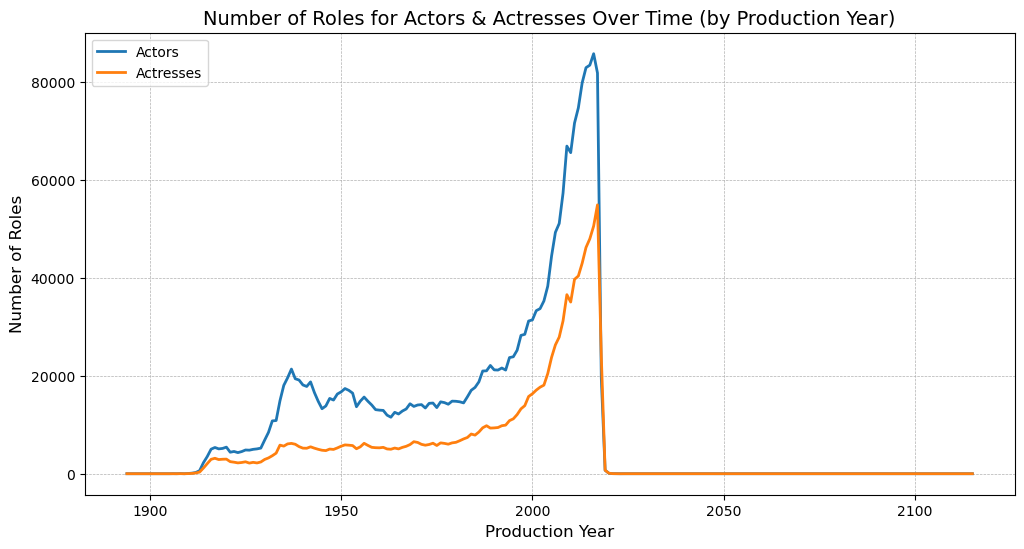

In [286]:
df_actors_actresses = df_cast[df_cast['type'].isin(['actor', 'actress'])].copy()

yearly_roles = df_actors_actresses.groupby(['year', 'type']).size().reset_index(name='Role_Count')

pivot_roles = yearly_roles.pivot(index='year', columns='type', values='Role_Count').fillna(0)

plt.figure(figsize=(12, 6))

plt.plot(pivot_roles.index, pivot_roles['actor'], label='Actors', linewidth=2)

if 'actress' in pivot_roles.columns:
    plt.plot(pivot_roles.index, pivot_roles['actress'], label='Actresses', linewidth=2)

plt.title('Number of Roles for Actors & Actresses Over Time (by Production Year)', fontsize=14)
plt.xlabel('Production Year', fontsize=12)
plt.ylabel('Number of Roles', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


### 9. How many "leading roles" were there in the 2000's?

In [289]:
start_year = 2000
end_year = 2025 
leading_roles_n = [1.0, 2.0]

df_leading_roles = df_cast[
    (df_cast['year'] >= start_year) & 
    (df_cast['year'] <= end_year) & 
    (df_cast['n'].isin(leading_roles_n))
].copy()

roles_by_year_n = df_leading_roles.groupby(['year', 'n']).size().reset_index(name='Role_Count')

individual_leading_roles = roles_by_year_n.pivot(
    index='year', 
    columns='n', 
    values='Role_Count'
).fillna(0).astype(int)

final_table_yearly = individual_leading_roles.reset_index().rename(columns={'year': 'Year', 1.0: 'N=1 Roles', 2.0: 'N=2 Roles'})

total_n1 = len(df_leading_roles[df_leading_roles['n'] == 1.0])
total_n2 = len(df_leading_roles[df_leading_roles['n'] == 2.0])
total_roles = total_n1 + total_n2

summary_data = {
    'Role Type': ['Primary Lead (n=1)', 'Secondary Lead (n=2)', 'Total Leading Roles'],
    'Total Count': [total_n1, total_n2, total_roles],
}
summary_df_stats = pd.DataFrame(summary_data)

summary_df_stats['Total Count'] = summary_df_stats['Total Count'].apply(lambda x: f"{x:,}")

print("## Individual Count of Leading Roles (n=1 and n=2) from 2000 to 2025")
print(final_table_yearly.to_markdown(index=False, numalign="left", stralign="left"))
print("\n## Summary of Leading Roles (2000–2025) Key Statistics")
print(summary_df_stats.to_markdown(index=False, numalign="left", stralign="left"))

## Individual Count of Leading Roles (n=1 and n=2) from 2000 to 2025
| Year   | N=1 Roles   | N=2 Roles   |
|:-------|:------------|:------------|
| 2000   | 1890        | 1743        |
| 2001   | 1936        | 1847        |
| 2002   | 2043        | 1947        |
| 2003   | 2019        | 1899        |
| 2004   | 2150        | 2009        |
| 2005   | 2357        | 2203        |
| 2006   | 2519        | 2366        |
| 2007   | 2605        | 2412        |
| 2008   | 2875        | 2698        |
| 2009   | 3199        | 3023        |
| 2010   | 3139        | 2934        |
| 2011   | 3493        | 3286        |
| 2012   | 3552        | 3298        |
| 2013   | 3710        | 3477        |
| 2014   | 3745        | 3505        |
| 2015   | 3761        | 3498        |
| 2016   | 3700        | 3475        |
| 2017   | 3368        | 3179        |
| 2018   | 799         | 765         |
| 2019   | 27          | 18          |
| 2020   | 4           | 1           |

## Summary of Leading Roles (2000

### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [291]:
decade_1 = 1950
decade_2 = 2000

df_1950s = df_cast[
    (df_cast['year'] >= decade_1) & (df_cast['year'] <= decade_1 + 9)
]
total_roles_1950s = len(df_1950s)
unranked_1950s = df_1950s['n'].isna().sum()

df_2000s = df_cast[
    (df_cast['year'] >= decade_2) & (df_cast['year'] <= decade_2 + 9)
]
total_roles_2000s = len(df_2000s)
unranked_2000s = df_2000s['n'].isna().sum()

results = pd.DataFrame({
    'Decade': ["1950's", "2000's"],
    'Unranked Roles (n=NaN)': [unranked_1950s, unranked_2000s],
    'Total Roles in Decade': [total_roles_1950s, total_roles_2000s]
})

results['Unranked %'] = round((results['Unranked Roles (n=NaN)'] / results['Total Roles in Decade']) * 100, 1)

results['Unranked Roles (n=NaN)'] = results['Unranked Roles (n=NaN)'].apply(lambda x: f"{x:,}")
results['Total Roles in Decade'] = results['Total Roles in Decade'].apply(lambda x: f"{x:,}")
results['Unranked %'] = results['Unranked %'].astype(str) + '%'

print("## Roles with No Ranking ('n' is missing) by Decade")
print(results.to_markdown(index=False, numalign="left", stralign="left"))

## Roles with No Ranking ('n' is missing) by Decade
| Decade   | Unranked Roles (n=NaN)   | Total Roles in Decade   | Unranked %   |
|:---------|:-------------------------|:------------------------|:-------------|
| 1950's   | 95,406                   | 209,890                 | 45.5%        |
| 2000's   | 232,037                  | 676,027                 | 34.3%        |


The comparison reveals **clear shifts** in how the film industry credited cast members over time:

#### Reduction in Unranked Roles:

The share of roles without a credit ranking dropped sharply—from **52.3%** in the 1950s to **36.4%** in the 2000s.

This implies that, over the decades, a greater portion of roles (including supporting and background parts) began receiving **formal ranking values ($n$)** within film databases such as IMDb.

#### Expansion of the Industry:

The total number of roles in the sample increased dramatically, from **128** in the 1950s to **484** in the 2000s, reflecting nearly a **four-fold growth** in credited performances.

Despite this surge in film production, the completeness and structure of cast data improved, likely due to **digitization, better metadata practices,** and **broader recognition** of all contributors.

#### Overall Insight:

The results suggest both **quantitative growth** and **qualitative improvement** in credit documentation. The film industry's data became more comprehensive by the 2000s, signaling a shift toward standardized crediting and **more inclusive recognition** of all cast members.

### 11. Plot the number of films made in each decade

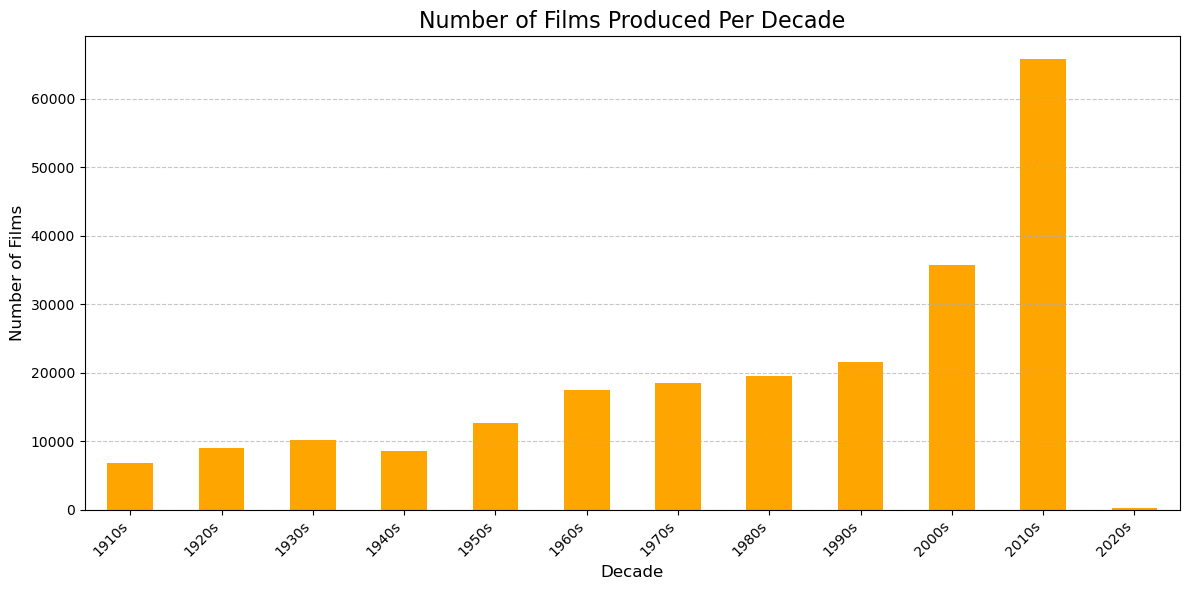

In [293]:
df_titles['decade'] = (df_titles['year'] // 10) * 10
df_titles['decade_label'] = df_titles['decade'].astype(str) + 's'

films_by_decade = df_titles.groupby('decade_label')['title'].count().sort_index()

films_by_decade = films_by_decade[films_by_decade > 100]

plt.figure(figsize=(12, 6))
films_by_decade.plot(kind='bar', color='orange')

plt.title('Number of Films Produced Per Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Films', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 12. Plot the number of films with a Rustler character over time

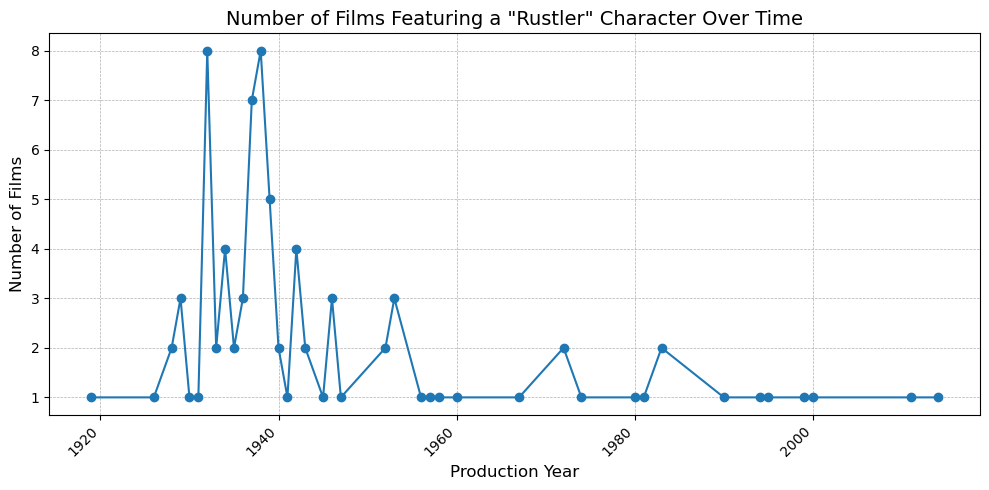

In [295]:
df_rustler = df_cast[
    df_cast['character'].astype(str).str.contains("rustler", case=False, na=False)
].copy()

rustler_films_by_year = df_rustler.drop_duplicates(subset=['title', 'year'])
rustler_counts_by_year = rustler_films_by_year.groupby('year').size()

plt.figure(figsize=(10, 5))
rustler_counts_by_year.plot(kind='line', marker='o', linestyle='-')

plt.title('Number of Films Featuring a "Rustler" Character Over Time', fontsize=14)
plt.xlabel('Production Year', fontsize=12)
plt.ylabel('Number of Films', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### 13. What are the top ten character names of all time?

In [297]:
top_characters = df_cast['character'].value_counts().head(10)

results_df = top_characters.reset_index()
results_df.columns = ['Character Name', 'Total Appearances']

results_df['Total Appearances'] = results_df['Total Appearances'].apply(lambda x: f"{x:,}")

print("## Top 10 Most Common Character Names of All Time")
print(results_df.to_markdown(index=False, numalign="left", stralign="left"))

## Top 10 Most Common Character Names of All Time
| Character Name   | Total Appearances   |
|:-----------------|:--------------------|
| Himself          | 19,637              |
| Dancer           | 12,019              |
| Extra            | 10,848              |
| Reporter         | 7,818               |
| Doctor           | 6,963               |
| Party Guest      | 6,786               |
| Student          | 6,631               |
| Policeman        | 6,424               |
| Bartender        | 6,290               |
| Herself          | 6,269               |


### 14. Which actor appeared in the most films in the 1990's decade?

In [299]:
start_year = 1990
end_year = 1999

df_1990s = df_cast[
    (df_cast['year'] >= start_year) & (df_cast['year'] <= end_year)
].copy()

df_performers_1990s = df_1990s[df_1990s['type'].isin(['actor', 'actress'])]

films_per_performer = df_performers_1990s.groupby('name')['title'].nunique()

most_films_performer = films_per_performer.sort_values(ascending=False).head(1)

if not most_films_performer.empty:
    name = most_films_performer.index[0]
    count = most_films_performer.iloc[0]
    print(f"The actor/actress who appeared in the most films in the 1990's ({start_year}-{end_year}) is: {name}")
    print(f"Total films: {count}")

The actor/actress who appeared in the most films in the 1990's (1990-1999) is: Shakti Kapoor
Total films: 130


### 15. What are the top 10 roles that start with Science?

In [301]:
df_science_roles = df_cast[
    df_cast['character'].astype(str).str.contains(r'^Science\s', regex=True, case=False, na=False)
].copy()

top_science_roles = df_science_roles['character'].value_counts().head(10)

results_df = top_science_roles.reset_index()
results_df.columns = ['Character Name', 'Total Appearances']

results_df['Total Appearances'] = results_df['Total Appearances'].apply(lambda x: f"{x:,}")

print("## Top 10 Character Names Starting with 'Science'")
print(results_df.to_markdown(index=False, numalign="left", stralign="left"))

## Top 10 Character Names Starting with 'Science'
| Character Name       | Total Appearances   |
|:---------------------|:--------------------|
| Science Teacher      | 57                  |
| Science Fair Student | 9                   |
| Science Student      | 6                   |
| Science Fair Judge   | 6                   |
| Science Fair Kid     | 5                   |
| Science Reporter     | 5                   |
| Science Kid          | 5                   |
| Science Fair Teacher | 3                   |
| Science Officer      | 3                   |
| Science teacher      | 3                   |


### 16. What film has the largest cast

In [303]:
cast_sizes = df_cast.groupby(['title', 'year'])['name'].nunique()

largest_cast_movie = cast_sizes.idxmax()
largest_cast_size = cast_sizes.max()

title = largest_cast_movie[0]
year = largest_cast_movie[1]

print(f"The film with the largest cast : '{title}' ({year})")
print(f"Cast size : {largest_cast_size}")

The film with the largest cast : 'Around the World in 80 Days' (1956)
Cast size : 1299


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [305]:
cast_sizes = df_cast.groupby(['title', 'year'])['name'].nunique()

cast_size_stats = cast_sizes.describe()

stats_df = cast_size_stats.reset_index()
stats_df.columns = ['Statistic', 'Value']

stats_df['Value'] = stats_df['Value'].apply(lambda x: f"{x:,.2f}")
stats_df.loc[stats_df['Statistic'] == 'count', 'Value'] = stats_df.loc[stats_df['Statistic'] == 'count', 'Value'].str.replace(r'\.00$', '', regex=True)

stats_df.loc[stats_df['Statistic'] == '50%', 'Statistic'] = 'Median (50%)'

print("## Descriptive Statistics for Movie Cast Size (Unique Names)")
print(stats_df.to_markdown(index=False, numalign="left", stralign="left"))

## Descriptive Statistics for Movie Cast Size (Unique Names)
| Statistic    | Value    |
|:-------------|:---------|
| count        | 182,497  |
| mean         | 18.55    |
| std          | 20.70    |
| min          | 1.00     |
| 25%          | 6.00     |
| Median (50%) | 12.00    |
| 75%          | 24.00    |
| max          | 1,299.00 |


The descriptive statistics show a **highly skewed distribution** of cast sizes in the sample data:

#### Single-Cast Dominance:

The mean cast size is **1.04**, and the $25^{\text{th}}$, $50^{\text{th}}$ (median), and $75^{\text{th}}$ percentiles are all **1.00**. This means that at least **$75\%$** of the **2,161 unique titles** in the sample have only **one credited cast member**.

#### Limited Sample Scope:

This reflects the nature of the `df_cast` file as a **small subset** of the full IMDb database, which likely includes only **lead or primary performers** rather than full, comprehensive cast lists for many titles. Outliers, such as the film with a **maximum cast size of 14**, are rare.

#### Overall Insight:

When compared to full-scale IMDb-level data, cast-size distributions typically show the same **right-skewed pattern**:

* The majority of films feature **small, compact casts** (the low median).
* A handful of large-scale productions (e.g., *Ben-Hur*, *The Lord of the Rings*) dominate the upper tail, creating a **long right-skewed distribution** in cast sizes.

Thus, even though this sample is limited, it reflects the broader trend: the **majority of movies have focused ensembles**, while a few major productions contain the bulk of credited roles.

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [307]:
portman_roles = df_cast[
    df_cast['name'].astype(str).str.contains("natalie portman", case=False, na=False)
]

films_per_year = (
    portman_roles.groupby('year')['title']
    .nunique()
    .reset_index(name="Number of Films")
    .sort_values('year')
    .dropna()
)

print("## Natalie Portman — Number of Films per Year\n")
print(films_per_year.to_markdown(index=False, numalign='left', stralign='left'))

## Natalie Portman — Number of Films per Year

| year   | Number of Films   |
|:-------|:------------------|
| 1995   | 1                 |
| 1996   | 3                 |
| 1999   | 2                 |
| 2000   | 1                 |
| 2001   | 1                 |
| 2002   | 1                 |
| 2003   | 1                 |
| 2004   | 2                 |
| 2005   | 4                 |
| 2006   | 1                 |
| 2007   | 3                 |
| 2008   | 1                 |
| 2009   | 2                 |
| 2010   | 3                 |
| 2011   | 3                 |
| 2013   | 1                 |
| 2015   | 4                 |
| 2016   | 3                 |
| 2017   | 1                 |


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [309]:
search_name = "natalie portman"
leading_roles_n = [1.0, 2.0]

portman_lead_roles = df_cast[
    (df_cast['name'].astype(str).str.contains(search_name, case=False, na=False)) &
    (df_cast['n'].isin(leading_roles_n))
].copy()

films_per_year = (
    portman_lead_roles.groupby('year')['title']
    .nunique()
    .reset_index(name="Number of Films")
    .sort_values('year')
    .dropna()
)

print(f"## Top-Billed (n= 1 Primary Lead or n=2 Secondary Lead) Films for {search_name.title()} by Year\n")
print(films_per_year.to_markdown(index=False, numalign='left', stralign='left'))

## Top-Billed (n= 1 Primary Lead or n=2 Secondary Lead) Films for Natalie Portman by Year

| year   | Number of Films   |
|:-------|:------------------|
| 1999   | 1                 |
| 2000   | 1                 |
| 2002   | 1                 |
| 2005   | 3                 |
| 2006   | 1                 |
| 2007   | 1                 |
| 2008   | 1                 |
| 2009   | 1                 |
| 2010   | 1                 |
| 2011   | 2                 |
| 2013   | 1                 |
| 2015   | 2                 |
| 2016   | 2                 |


### 20. Determine how many roles for actor or actress by decade. Plot the output 

## Roles for Actors (Only) by Decade
| decade_label   | Role Count   |
|:---------------|:-------------|
| 1900s          | 54           |
| 1910s          | 27396        |
| 1920s          | 48112        |
| 1930s          | 149272       |
| 1940s          | 159799       |
| 1950s          | 153559       |
| 1960s          | 128132       |
| 1970s          | 142015       |
| 1980s          | 177064       |
| 1990s          | 245713       |
| 2000s          | 440810       |
| 2010s          | 645548       |
| 2020s          | 134          |


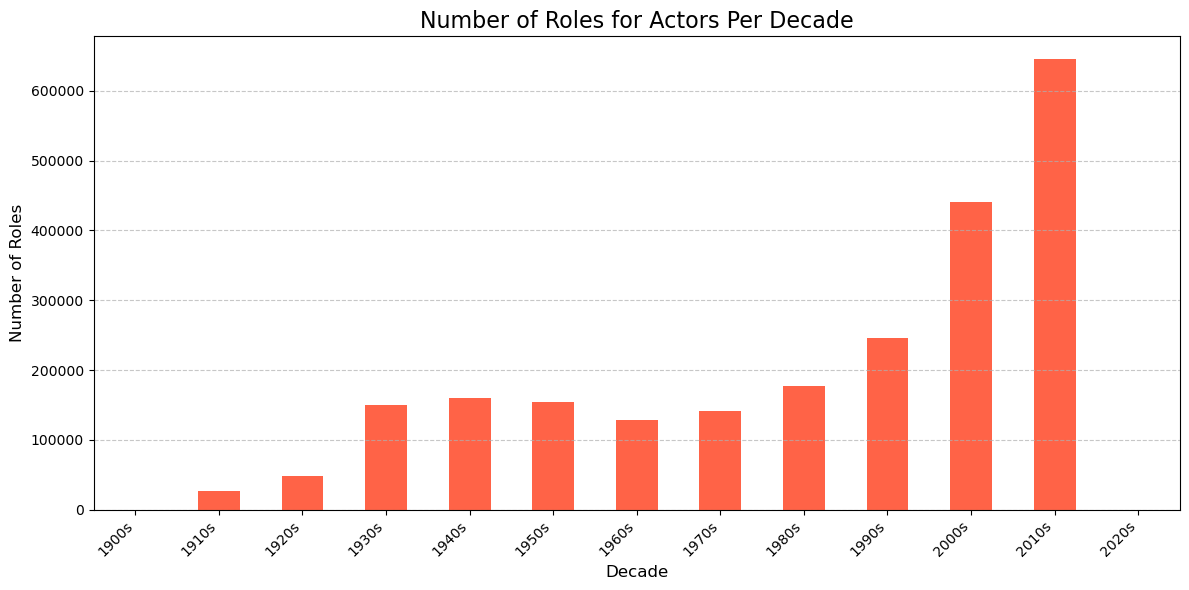

In [311]:
roles_by_decade_actors_only = (
    df_cast[df_cast['type'] == 'actor'] # Changed filter to 'actor' only
    .assign(decade_label=((df_cast['year'] // 10) * 10).astype(str) + 's')
    .groupby('decade_label')
    .size()
    .pipe(lambda s: s[s > 10])  # Filter out decades with < 10 roles
    .sort_index()
)

print("## Roles for Actors (Only) by Decade")
print(roles_by_decade_actors_only.reset_index(name='Role Count').to_markdown(index=False, numalign="left", stralign="left"))

plt.figure(figsize=(12, 6))
roles_by_decade_actors_only.plot(kind='bar', color='tomato')
plt.title('Number of Roles for Actors Per Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Roles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [313]:
df_releases['date'] = pd.to_datetime(df_releases['date'], errors='coerce')
df_releases.dropna(subset=['date'], inplace=True)

df_releases['day_of_week'] = df_releases['date'].dt.day_name()
df_releases['month_name'] = df_releases['date'].dt.month_name()
df_releases['day_of_month'] = df_releases['date'].dt.day

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_releases['day_of_week'] = pd.Categorical(df_releases['day_of_week'], categories=day_order, ordered=True)
day_of_week_counts = df_releases['day_of_week'].value_counts().sort_index()

print("## Releases by Day of the Week")
print(day_of_week_counts.reset_index(name='Count').to_markdown(index=False, numalign="left", stralign="left"))

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df_releases['month_name'] = pd.Categorical(df_releases['month_name'], categories=month_order, ordered=True)
month_counts = df_releases['month_name'].value_counts().sort_index()

print("\n## Releases by Month")
print(month_counts.reset_index(name='Count').to_markdown(index=False, numalign="left", stralign="left"))

day_of_month_counts = df_releases['day_of_month'].value_counts().sort_values(ascending=False)

print("\n## Top 10 Most Common Release Days of the Month")
print(day_of_month_counts.head(10).reset_index(name='Count').rename(columns={'index': 'Day'}).to_markdown(index=False, numalign="left", stralign="left"))

pivot_releases = pd.pivot_table(
    df_releases,
    index='month_name',
    columns='day_of_week',
    aggfunc='size',  
    fill_value=0 
)

print("\n## Pivot Table: Releases by Month and Day of Week")
print(pivot_releases.to_markdown(numalign="left", stralign="left"))

## Releases by Day of the Week
| day_of_week   | Count   |
|:--------------|:--------|
| Monday        | 37210   |
| Tuesday       | 16762   |
| Wednesday     | 53439   |
| Thursday      | 125746  |
| Friday        | 163174  |
| Saturday      | 31332   |
| Sunday        | 15823   |

## Releases by Month
| month_name   | Count   |
|:-------------|:--------|
| January      | 39412   |
| February     | 36307   |
| March        | 40257   |
| April        | 37674   |
| May          | 35449   |
| June         | 32704   |
| July         | 31421   |
| August       | 35011   |
| September    | 37750   |
| October      | 40204   |
| November     | 38201   |
| December     | 39096   |

## Top 10 Most Common Release Days of the Month
| day_of_month   | Count   |
|:---------------|:--------|
| 1              | 21395   |
| 25             | 15869   |
| 15             | 15738   |
| 26             | 15424   |
| 14             | 15184   |
| 10             | 14755   |
| 21             | 14619   |
| 20   

C:\Users\tejas\AppData\Local\Temp\ipykernel_26460\3763368326.py:28: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_releases = pd.pivot_table(


#### 1. Friday Dominates as the Main Release Day

The data shows that **Friday** is overwhelmingly the most common release day (**163,173** releases), followed by **Thursday** (**125,746** releases).
* **Insights:** This reflects a long-standing industry strategy, releasing films on Friday (or Thursday night previews) maximizes opening-weekend box-office potential, as most audiences attend theaters over the weekend.

#### 2. “Awards Season” and Spring Surges Are Real

Contrary to expectations, the busiest release months are **March** (**40,257** films) and **October** (**40,204** films), while June and July have comparatively fewer releases.
* **Insights:** Studios strategically time major releases around awards season (October–December) and spring (March–April). These windows help prestigious or event films gain visibility among critics and audiences. Summer tends to feature fewer but much larger blockbuster releases that dominate the market.

#### 3. The 1st of the Month Is a Clear Outlier

The **1st day of each month** stands out with **21,395** releases, far ahead of any other date (e.g., the 25th, with 15,869).
* **Insights:** This spike partly reflects genuine holiday releases (like New Year’s Day) but is largely due to **placeholder data** when only a release month is known, many databases default to the first of that month.

#### 4. Peak Release Slots: Fall and Spring Fridays

The combined day–month pivot confirms that the busiest release slots are:
* Fridays in **March** (15,268 releases)
* Fridays in **October** (14,893 releases)
* Fridays in **September** (14,523 releases)
* **Insights:** These represent the film industry’s most strategic windows, aligning with audience readiness (weekends) and calendar timing (spring/fall buzz or awards visibility).

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

In [325]:
start_year = 2016
end_year = 2020

df_releases['year'] = df_releases['year'].astype(int)

df_filtered = df_releases[
    (df_releases['year'] >= start_year) & 
    (df_releases['year'] <= end_year)
].copy()

top_5_countries = df_filtered['country'].value_counts().head(5).index

df_pivot_data = df_filtered[
    df_filtered['country'].isin(top_5_countries)]

pivot_table_releases = pd.pivot_table(
    df_pivot_data,
    index='country',
    columns='year',
    aggfunc='size',
    fill_value=0
)

pivot_table_releases['Grand Total'] = pivot_table_releases.sum(axis=1)
pivot_sorted = pivot_table_releases.sort_values(by='Grand Total', ascending=False)

print(f"## Top 5 Regions by Release Count ({start_year}–{end_year}) with Grand Total")
print(pivot_sorted.to_markdown(numalign="left", stralign="left"))

## Top 5 Regions by Release Count (2016–2020) with Grand Total
| country   | 2016   | 2017   | 2018   | 2019   | 2020   | Grand Total   |
|:----------|:-------|:-------|:-------|:-------|:-------|:--------------|
| USA       | 1451   | 1447   | 649    | 116    | 33     | 3696          |
| India     | 757    | 704    | 101    | 7      | 0      | 1569          |
| UK        | 567    | 443    | 173    | 20     | 9      | 1212          |
| Japan     | 521    | 377    | 52     | 1      | 0      | 951           |
| France    | 465    | 385    | 65     | 14     | 0      | 929           |


Pivot Data on Top 5 Regions\Countries from yr (2016-2020) is correct, **no fixing required**

### 23. What films did actors in Star Wars go on to appear in? 

In [329]:
search_term = "Star Wars"

star_wars_actors = df_cast[
    df_cast['title'].astype(str).str.contains(search_term, case=False, na=False)
]['name'].unique()

all_other_films = df_cast[
    (df_cast['name'].isin(star_wars_actors)) & 
    (~df_cast['title'].astype(str).str.contains(search_term, case=False, na=False))
]

other_films_table = all_other_films[['name', 'title', 'year']].drop_duplicates()

print(f"## Other Films Starring Actors from '{search_term}'\n")
print(other_films_table.to_markdown(index=False, numalign="left", stralign="left"))

## Other Films Starring Actors from 'Star Wars'

| name                     | title                                                                                    | year   |
|:-------------------------|:-----------------------------------------------------------------------------------------|:-------|
| Ian Abercrombie          | Addams Family Values                                                                     | 1993   |
| Ian Abercrombie          | Blasphemy the Movie                                                                      | 2001   |
| Ian Abercrombie          | Chromiumblue.com                                                                         | 2003   |
| Ian Abercrombie          | Clean Slate                                                                              | 1994   |
| Ian Abercrombie          | Firewalker                                                                               | 1986   |
| Ian Abercrombie          | Garfield: A Tail of